Practical 6: Instance-Based Learning


In [2]:
import pandas as pd

df = pd.read_csv('data/house-prices.csv')


print(len(df))
print(df.items)
print(df.dtypes)
print('++++++',type(df.loc[0][0]))

128
<bound method DataFrame.items of      HomeID   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0         1  114300  1790         2          2       2    No         East
1         2  114200  2030         4          2       3    No         East
2         3  114800  1740         3          2       1    No         East
3         4   94700  1980         3          2       3    No         East
4         5  119800  2130         3          3       3    No         East
..      ...     ...   ...       ...        ...     ...   ...          ...
123     124  119700  1900         3          3       3   Yes         East
124     125  147900  2160         4          3       3   Yes         East
125     126  113500  2070         2          2       2    No        North
126     127  149900  2020         3          3       1    No         West
127     128  124600  2250         3          3       4    No        North

[128 rows x 8 columns]>
HomeID           int64
Price            int64
SqFt

3 Build a Distance Matrix

In [3]:
import math
import numpy as np

#Euclidean Distance

def number_squared_difference(v0,v1):
    mid_vaule = v0 - v1
    return mid_vaule**2

def nominal_distance(v0,v1):
    if v0 == v1:
        return 1
    else:
        return 0

def instance_euclidean_distance(X0,X1):
    sum = 0
    #ignore the HomeID
    for i in range(1,6):
        if type(X0[i]) == np.int64:
            sum += number_squared_difference(X0[i],X1[i])
        else:
            sum += nominal_distance(X0[i],X1[i])
    return math.sqrt(sum)

print(instance_euclidean_distance(df.loc[0],df.loc[1]))

    

260.0096152068227


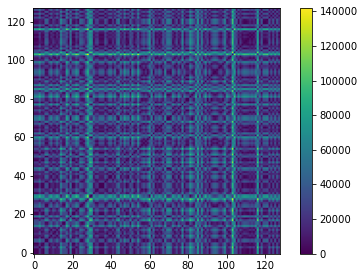

In [14]:
from pyecharts import HeatMap
import matplotlib
import matplotlib.pyplot as plt

heatmap_euclidean_matrix = []

for i in range(128):
    heat_list=[]
    for j in range(128):
        if (i==j):
            heat_list.append(0)
        else:
            heat_list.append(instance_euclidean_distance(df.loc[i],df.loc[j]))
    heatmap_euclidean_matrix.append(heat_list)
#print(heatmap_euclidean_matrix)

x_axis = [i for i in range(128)]
y_axis = [i for i in range(128)]


#heatmap = HeatMap()
#    "热力图直角坐标系",
#    x_axis,
#    y_axis,
#    heatmap_euclidean_matrix,
#    is_visualmap=True,
#    visual_text_color="#000",
#    visual_orient="horizontal",
#)
#heatmap.render()
# 这里是创建一个画布
fig, ax = plt.subplots()
im = ax.imshow(heatmap_euclidean_matrix)

fig.tight_layout()
plt.gca().invert_yaxis()
plt.colorbar(im)
plt.show()





In [16]:
#Manhattan Distance
def number_absolute_difference(v0,v1):
    mid_vaule = v0 - v1
    return abs(mid_vaule)

def instance_manhattan_distance(X0,X1):
    sum = 0
    #ignore the HomeID
    for i in range(1,6):
        if type(X0[i]) == np.int64:
            sum += number_absolute_difference(X0[i],X1[i])
        else:
            sum += nominal_distance(X0[i],X1[i])
    return sum

print(instance_manhattan_distance(df.loc[0],df.loc[1]))


343


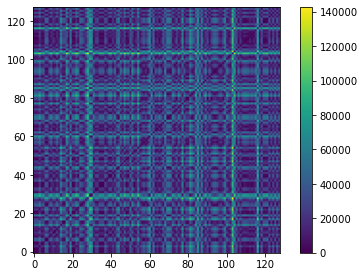

In [17]:
heatmap_manhattan_matrix = []

for i in range(128):
    heat_list=[]
    for j in range(128):
        if (i==j):
            heat_list.append(0)
        else:
            heat_list.append(instance_manhattan_distance(df.loc[i],df.loc[j]))
    heatmap_manhattan_matrix.append(heat_list)
#print(heatmap_euclidean_matrix)




# 这里是创建一个画布
fig, ax = plt.subplots()
im = ax.imshow(heatmap_manhattan_matrix)

fig.tight_layout()
plt.gca().invert_yaxis()
plt.colorbar(im)
plt.show()

4 Build an Instance-Based Model

In [25]:
def find_price_5neighbours(sqft,bedroom,bathroom,offer,brick,neighborhood):
    neighbors = {}
    for i in range(128):
        d1 = abs(sqft-df.loc[i][2])
        d2 = abs(bedroom-df.loc[i][3])
        d3 = abs(bathroom-df.loc[i][4])
        d4 = abs(offer-df.loc[i][5])
        d5 = nominal_distance(brick,df.loc[i][6])
        d6 = nominal_distance(neighborhood,df.loc[i][7])
        sum = d1+d2+d3+d4+d5+d6
        neighbors[df.loc[i][1]] = sum
    neighbors_list = sorted(neighbors.items(),key=lambda x:x[1])
    average_price = 0
    for i in range(5):
        average_price += neighbors_list[i][0]
    average_price /= 5

    return average_price
print(find_price_5neighbours(2050,2,1,2,'No','East'))
    
    

146680.0


5 Numeric Variation

     HomeID   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0         1  114300  1790         2          2       2     0            0
1         2  114200  2030         4          2       3     0            0
2         3  114800  1740         3          2       1     0            0
3         4   94700  1980         3          2       3     0            0
4         5  119800  2130         3          3       3     0            0
..      ...     ...   ...       ...        ...     ...   ...          ...
123     124  119700  1900         3          3       3     1            0
124     125  147900  2160         4          3       3     1            0
125     126  113500  2070         2          2       2     0           90
126     127  149900  2020         3          3       1     0          180
127     128  124600  2250         3          3       4     0           90

[128 rows x 8 columns]


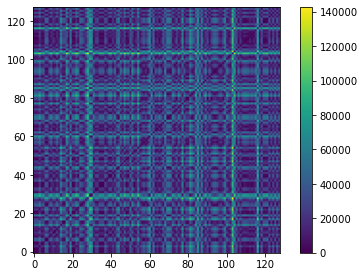

In [39]:
#不能用线性替换 如 df.loc[i][1] 而要用df.loc[i,1]
for i in range(128):
    if df.loc[i,'Brick'] == 'No':
        df.loc[i,'Brick'] = 0
    else:
        df.loc[i,'Brick'] = 1
    
    if df.loc[i,'Neighborhood'] == 'East':
        df.loc[i,'Neighborhood'] = 0
    elif df.loc[i,'Neighborhood'] == 'North':
        df.loc[i,'Neighborhood'] = 90
    elif df.loc[i,'Neighborhood'] == 'West':
        df.loc[i,'Neighborhood'] = 180
    elif df.loc[i,'Neighborhood'] == 'South':
        df.loc[i,'Neighborhood'] = 270


print(df)
heatmap_manhattan_matrix = []

for i in range(128):
    heat_list=[]
    for j in range(128):
        if (i==j):
            heat_list.append(0)
        else:
            heat_list.append(instance_manhattan_distance(df.loc[i],df.loc[j]))
    heatmap_manhattan_matrix.append(heat_list)
#print(heatmap_euclidean_matrix)




# 这里是创建一个画布
fig, ax = plt.subplots()
im = ax.imshow(heatmap_manhattan_matrix)

fig.tight_layout()
plt.gca().invert_yaxis()
plt.colorbar(im)
plt.show()

In [36]:
print(df)
def all_number_find_price_5neighbours(sqft,bedroom,bathroom,offer,brick,neighborhood):
    neighbors = {}
    for i in range(128):
        d1 = abs(sqft-df.loc[i][2])
        d2 = abs(bedroom-df.loc[i][3])
        d3 = abs(bathroom-df.loc[i][4])
        d4 = abs(offer-df.loc[i][5])
        d5 = abs(brick-df.loc[i][6])
        d6 = abs(neighborhood-df.loc[i][7])
        sum = d1+d2+d3+d4+d5+d6
        neighbors[df.loc[i][1]] = sum
    neighbors_list = sorted(neighbors.items(),key=lambda x:x[1])
    average_price = 0
    for i in range(5):
        average_price += neighbors_list[i][0]
    average_price /= 5

    return average_price
print(all_number_find_price_5neighbours(2050,2,1,2,0,0))

     HomeID   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0         1  114300  1790         2          2       2     0            0
1         2  114200  2030         4          2       3     0            0
2         3  114800  1740         3          2       1     0            0
3         4   94700  1980         3          2       3     0            0
4         5  119800  2130         3          3       3     0            0
..      ...     ...   ...       ...        ...     ...   ...          ...
123     124  119700  1900         3          3       3     1            0
124     125  147900  2160         4          3       3     1            0
125     126  113500  2070         2          2       2     0           90
126     127  149900  2020         3          3       1     0          180
127     128  124600  2250         3          3       4     0           90

[128 rows x 8 columns]
133820.0


6 Build a K-Nearest Neighbours Model

In [42]:
import sklearn.neighbors as neighbors
nn = neighbors.NearestNeighbors(n_neighbors=128,algorithm='kd_tree',metric='euclidean')
nn.fit(df)
dist,ind = nn.kneighbors(df,return_distance=True)
print(dist)



[[    0.           260.01153821   313.41027424 ... 74001.69748729
  85201.73631447 96902.40201357]
 [    0.           260.01153821   411.58474219 ... 74100.59283838
  85300.66374302 97001.08713824]
 [    0.           173.15599903   222.95739503 ... 73502.03665886
  84702.05372363 96402.76245005]
 ...
 [    0.           325.14765876   717.69143788 ... 74800.28145669
  86000.32904588 97700.74457751]
 [    0.           321.04516816   671.71869112 ... 67600.33279504
  68601.09466328 80801.20116681]
 [    0.           275.45235523  1050.91959731 ... 63700.07747248
  74900.06566085 86600.25853888]]


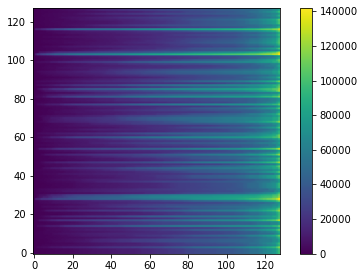

In [43]:
fig, ax = plt.subplots()
im = ax.imshow(dist)

fig.tight_layout()
plt.gca().invert_yaxis()
plt.colorbar(im)
plt.show()

In [45]:
nn = neighbors.NearestNeighbors(n_neighbors=6,algorithm='kd_tree',metric='euclidean')
nn.fit(df)
dist,ind = nn.kneighbors(df,return_distance=True)
print(ind)

[[  0   1   5   2  21 111]
 [  1   0  21   5   2 125]
 [  2 111   5   0   1 113]
 [  3  68  22  89  51  84]
 [  4 123   8  63  78  34]
 [  5   2   0 111   1  21]
 [  6  67  50  57  95   7]
 [  7  50 118 126   6  67]
 [  8 123   4  63  34 117]
 [  9  45 100  86  12 115]
 [ 10  96  41  38 107  53]
 [ 11 101 112 114 127  78]
 [ 12  86 115 100  45   9]
 [ 13  66  97  73  55  88]
 [ 14  77  60  87  30  99]
 [ 15  98 122 105  37  16]
 [ 16  37 105  83 124  15]
 [ 17 104  54  47  84  51]
 [ 18 110  65  31 120 119]
 [ 19  70  44  69  82  99]
 [ 20  48  91 113 108  35]
 [ 21 125   1   0   5   2]
 [ 22  51  84  47  68   3]
 [ 23 121  42  40  75  72]
 [ 24  93  59  71  43  95]
 [ 25 126 118   7 124  83]
 [ 26 102  58  32  33 107]
 [ 27  89  61 115  12  86]
 [ 28  54 104  17  47  84]
 [ 29  85  81  30  60  14]
 [ 30  60  81  14  77  29]
 [ 31 110  18 125  65  21]
 [ 32 107  41  96 102  26]
 [ 33  56  58  26 102  92]
 [ 34 117  36  52  35 108]
 [ 35 108  52  36  91  34]
 [ 36  52 117  34  35 108]
 

7 Build a Gaussian Mixture Model